In [6]:

DF_PATH = "../data/train.pkl"
DF_PATH1 = "../data/test.pkl"

# Import libraries

In [ ]:
!pip install catboost

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 98.6/98.6 MB 3.4 MB/s eta 0:00:00


In [2]:
# import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from lightgbm import LGBMRegressor
from xgboost import XGBRegressor
from catboost import Pool, CatBoostRegressor
from sklearn import svm
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_absolute_error, mean_squared_error, make_scorer

# Read data

In [7]:
train = pd.read_pickle(DF_PATH)
test = pd.read_pickle(DF_PATH1)

print(train.shape)
print(test.shape)

(37872, 5)
(9468, 5)


In [ ]:
train.head()

,AT,V,AP,RH,PE
5444,6.75,39.40,1011.28,90.84,483.77
44734,10.08,41.16,1023.14,96.03,469.17
39601,14.32,44.60,1013.85,68.13,466.36
2928,19.04,51.86,1018.05,79.01,458.64
29411,29.17,67.45,1014.10,46.85,435.08


# Split data

In [8]:
# remove target feature
X = train.drop('PE',axis=1)
y = train['PE']

In [9]:
# split train data into train set and validation set
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

print(f'--> X_train: {X_train.shape}')
print(f'--> X_val: {X_val.shape}')
print(f'--> y_train: {y_train.shape}')
print(f'--> y_val: {y_val.shape}')

--> X_train: (30297, 4)
--> X_val: (7575, 4)
--> y_train: (30297,)
--> y_val: (7575,)


# Feature Scaling

In [10]:
# scale
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_val_scaled = scaler.transform(X_val)


# Models

## LinearRegression

In [21]:
RMSE_DIC = {}

In [12]:
linear_model = LinearRegression()
# fit on train data
model_fit = linear_model.fit(X_train_scaled,y_train)

# predict on train data
prediction = model_fit.predict(X_val_scaled)


In [13]:
def RMSE(y,y_hat):
  return np.sqrt(mean_squared_error(y,y_hat))

print(f"RMSE: {RMSE(y_val,prediction)}")
print(f"MAE: {mean_absolute_error(y_val,prediction)}")

RMSE: 4.562937139838694
MAE: 3.6378391238945946


In [22]:
RMSE_DIC["LinearRegression"] = 4.5629

## DecisionTreeRegressor


In [15]:
# Create the Decision Tree Regressor
decision_tree_model = DecisionTreeRegressor(min_samples_split = 2,
                                             max_depth = 64,
                                             random_state = 42).fit(X_train_scaled,y_train)

In [16]:
print(f"RMSE 0f DecisionTreeRegressor: {RMSE(y_val, decision_tree_model.predict(X_val_scaled)):.4f}")
print(f"MAE: {mean_absolute_error(y_val, decision_tree_model.predict(X_val_scaled)):.4f}")

RMSE 0f DecisionTreeRegressor: 0.4593
MAE: 0.0452


In [23]:
RMSE_DIC["DecisionTreeRegressor"] = 0.4593

## RandomForestRegressor


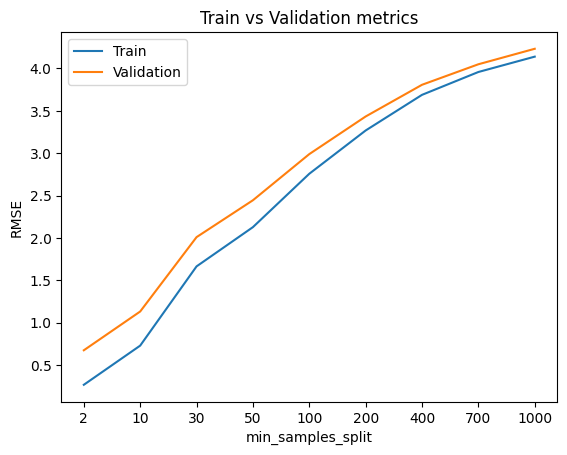

In [18]:
min_samples_split_list = [2,10, 30, 50, 100, 200, 400, 700, 1000]
max_depth_list = [1,2, 3, 4, 7, 8, 16, 32, 64, None] # None means that there is no depth limit.
n_estimators_list = [10,50,100,500]


RMSE_list_train = []
RMSE_list_val = []

for min_samples_split in min_samples_split_list:

    # fit the model
    model = RandomForestRegressor(min_samples_split = min_samples_split,random_state = 42).fit(X_train_scaled,y_train)

    predictions_train = model.predict(X_train_scaled) ## The predicted values for the train dataset
    predictions_val = model.predict(X_val_scaled) ## The predicted values for the test dataset
    RMSE_train = RMSE(y_train,predictions_train)
    RMSE_val = RMSE(y_val,predictions_val)
    RMSE_list_train.append(RMSE_train)
    RMSE_list_val.append(RMSE_val)

plt.title('Train vs Validation metrics')
plt.xlabel('min_samples_split')
plt.ylabel('RMSE')
plt.xticks(ticks = range(len(min_samples_split_list )),labels=min_samples_split_list)
plt.plot(RMSE_list_train)
plt.plot(RMSE_list_val)
plt.legend(['Train','Validation'])

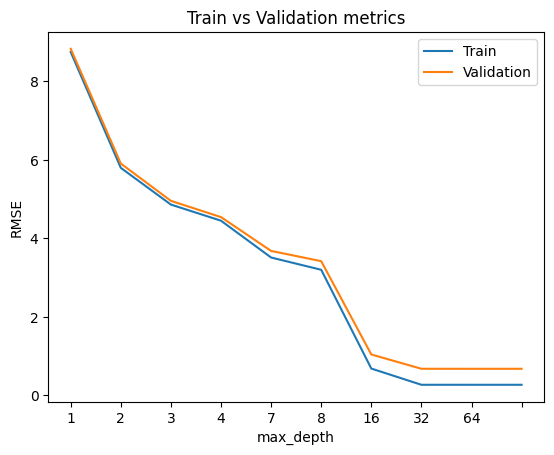

In [19]:

RMSE_list_train = []
RMSE_list_val = []

for max_depth in max_depth_list:

    # fit the model
    model = RandomForestRegressor(max_depth = max_depth,random_state = 42).fit(X_train_scaled,y_train)

    predictions_train = model.predict(X_train_scaled) ## The predicted values for the train dataset
    predictions_val = model.predict(X_val_scaled) ## The predicted values for the validation dataset
    RMSE_train = RMSE(y_train,predictions_train)
    RMSE_val = RMSE(y_val,predictions_val)
    RMSE_list_train.append(RMSE_train)
    RMSE_list_val.append(RMSE_val)

plt.title('Train vs Validation metrics')
plt.xlabel('max_depth')
plt.ylabel('RMSE')
plt.xticks(ticks = range(len(max_depth_list )),labels=max_depth_list)
plt.plot(RMSE_list_train)
plt.plot(RMSE_list_val)
plt.legend(['Train','Validation'])

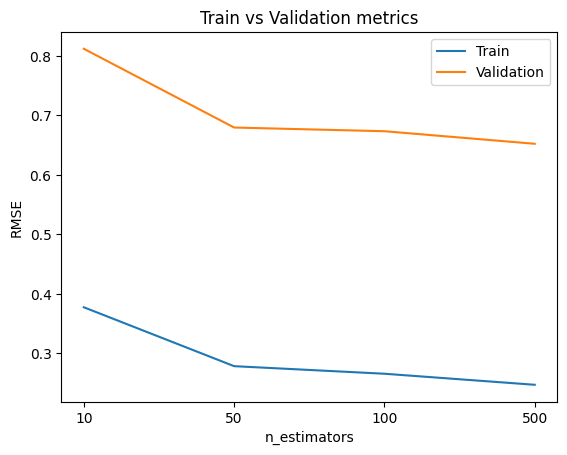

In [20]:

RMSE_list_train = []
RMSE_list_val = []

for n_estimators in n_estimators_list:

    # fit the model
    model = RandomForestRegressor(n_estimators = n_estimators,random_state = 42).fit(X_train_scaled,y_train)

    predictions_train = model.predict(X_train_scaled) ## The predicted values for the train dataset
    predictions_val = model.predict(X_val_scaled) ## The predicted values for the validation dataset
    RMSE_train = RMSE(y_train,predictions_train)
    RMSE_val = RMSE(y_val,predictions_val)
    RMSE_list_train.append(RMSE_train)
    RMSE_list_val.append(RMSE_val)

plt.title('Train vs Validation metrics')
plt.xlabel('n_estimators')
plt.ylabel('RMSE')
plt.xticks(ticks = range(len(n_estimators_list )),labels=n_estimators_list)
plt.plot(RMSE_list_train)
plt.plot(RMSE_list_val)
plt.legend(['Train','Validation'])

so we work with:
- n_estimators = 500
- max_depth = 65
- min_samples_split = 2

In [ ]:
# Create the RandomForestRegressor
RandomForest_model = RandomForestRegressor(min_samples_split = 2,
                                             max_depth = 64,
                                             random_state = 42).fit(X_train_scaled,y_train)

In [ ]:
print(f"RMSE 0f RandomForestRegressor: {RMSE(y_val, RandomForest_model.predict(X_val_scaled)):.4f}")
print(f"MAE of RandomForestRegressor: {mean_absolute_error(y_val, RandomForest_model.predict(X_val_scaled)):.4f}")

In [24]:
RMSE_DIC["RandomForestRegressor"] = 0.6738

## LGBMRegressor


In [ ]:
# use GridSearchCV to get best hyperparameter
lgb_params = {
    'n_estimators':[10,50,200,500,700],
    'max_depth':[5,20,40,65,70],
    'learning_rate':[0.01,0.1,0.9,1],
    'random_state':[42],
    'class_weight':['balanced'],
}

# Create the RMSE scorer
rmse_scorer = make_scorer(lambda y_true, y_pred: np.sqrt(mean_squared_error(y_true, y_pred)), greater_is_better=False)

lgb_rg = GridSearchCV(LGBMRegressor(),
                      lgb_params,
                      scoring = rmse_scorer,
                      verbose=1
                     )

lgb_rg.fit(X_train_scaled,y_train)

print(lgb_rg.best_params_)
print(lgb_rg.best_score_)

In [ ]:
lgb_clf = LGBMRegressor(class_weight = 'balanced',
                             learning_rate = 0.9,
                             max_depth = 20,
                             n_estimators = 700,
                             random_state = 42,
                             )
lgb_clf.fit(X_train_scaled, y_train,
            eval_set = [(X_train_scaled, y_train),(X_val_scaled, y_val)],
            early_stopping_rounds = 300,
            verbose=1,
            eval_metric='rmse'
           )

In [25]:
RMSE_DIC["LGBMRegressor"] = 0.5692

## XGBRegressor


In [ ]:
# use GridSearchCV to get best hyperparameter
xgb_params = {
    'n_estimators':[10,50,200,500,700],
    'max_depth':[5,20,40,65,70],
    'learning_rate':[0.01,0.1,0.9,1],
    'random_state':[42],
}

# Create the RMSE scorer
rmse_scorer = make_scorer(lambda y_true, y_pred: np.sqrt(mean_squared_error(y_true, y_pred)), greater_is_better=False)

xgb_rg = GridSearchCV(XGBRegressor(),
                      xgb_params,
                      scoring = rmse_scorer,
                      verbose=1
                     )

xgb_rg.fit(X_train_scaled,y_train)

print(xgb_rg.best_params_)
print(xgb_rg.best_score_)

In [ ]:
xgb_rg = XGBRegressor(learning_rate = 0.1,
                             max_depth = 70,
                             n_estimators = 500,
                             random_state = 42,
                             )
xgb_rg.fit(X_train_scaled, y_train,
            eval_set = [(X_val_scaled, y_val)],
            early_stopping_rounds = 300,
            verbose=1,
            eval_metric=['rmse','mae']
           )

In [26]:
RMSE_DIC["XGBRegressor"] = 0.3080

## CatBoostRegressor


In [ ]:
# use GridSearchCV to get best hyperparameter
cat_params = {
    'n_estimators':[10,50,200,500,700],
    'depth':[5,20,40,65,70],
    'learning_rate':[0.01,0.1,0.9,1],
    'random_state':[42],
}

# Create the RMSE scorer
rmse_scorer = make_scorer(lambda y_true, y_pred: np.sqrt(mean_squared_error(y_true, y_pred)), greater_is_better=False)

cat_rg = GridSearchCV(CatBoostRegressor(),
                      cat_params,
                      scoring = rmse_scorer,
                      verbose=1
                     )

cat_rg.fit(X_train_scaled,y_train)

print(cat_rg.best_params_)
print(cat_rg.best_score_)

In [ ]:
cat_rg = CatBoostRegressor(learning_rate = 1,
                             depth = 5,
                             n_estimators = 700,
                             random_state = 42,
                            eval_metric='RMSE',
                             )

cat_rg.fit(X_train_scaled, y_train,
            eval_set = [(X_val_scaled, y_val)],
            early_stopping_rounds = 300,
            verbose=1
           )

In [27]:
RMSE_DIC["CatBoostRegressor"] = 1.4605

## SVM

In [ ]:
regr = svm.SVR()
# fit
regr.fit(X_train_scaled, y_train)
# predict
y_hat = regr.predict(X_val_scaled)

print(f"RMSE: {RMSE(y_val, y_hat)}")
print(f"MAE: {mean_absolute_error(y_val, y_hat)}")



In [28]:
RMSE_DIC['SVM'] = 4.1011

# visualization

In [29]:
RMSE_DIC

{'LinearRegression': 4.5629,
 'DecisionTreeRegressor': 0.4593,
 'RandomForestRegressor': 0.6738,
 'LGBMRegressor': 0.5692,
 'XGBRegressor': 0.308,
 'CatBoostRegressor': 1.4605,
 'SVM': 4.1011}

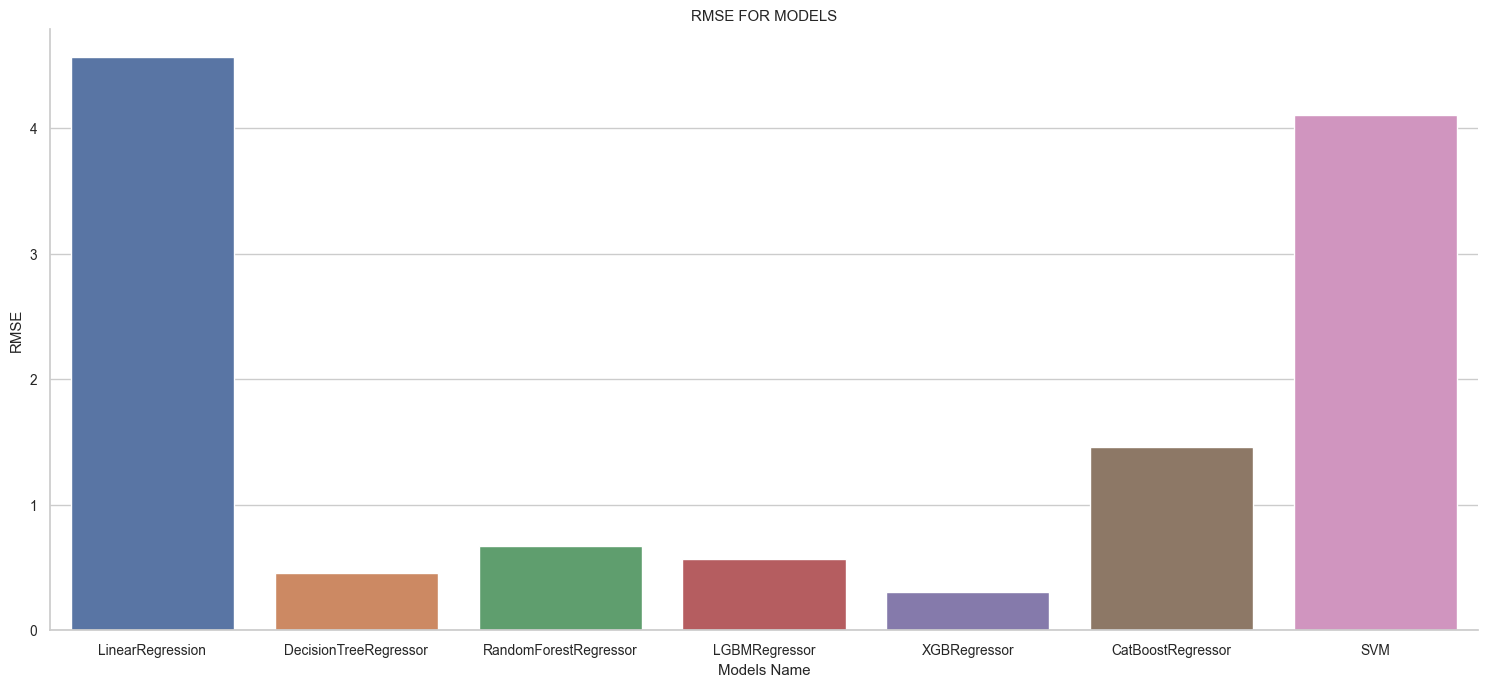

In [32]:
import seaborn as sns
sns.set(font_scale=0.9)
plt.figure(figsize=(15,7))
sns.set_style("whitegrid")
sns.barplot(x=list(RMSE_DIC.keys()),y=list(RMSE_DIC.values())).set(title="RMSE FOR MODELS")
plt.xlabel('Models Name')
plt.ylabel('RMSE')
sns.despine()
plt.tight_layout()
plt.show()

In [33]:
import plotly.express as px
# Example data
x = list(RMSE_DIC.keys())
y = list(RMSE_DIC.values())

# Create the bar plot
fig = px.bar(x=x, y=y, title='RMSE FOR MODELS', color = x, labels={'x': 'Models Name', 'y': 'RMSE'})

# Display the plot
fig.show()

As we see that:
- `XGBRegressor` has the best Score here = 0.308
- Base model `LinearRegression` is the worst one with value = 4.5629

# Stacking Models

In [ ]:
from sklearn.ensemble import VotingRegressor


voting_rg = VotingRegressor(estimators = [
    ('Dt',decision_tree_model ),
    ('rf',RandomForest_model ),
    ('lgb',lgb_clf),
    ('xgb',xgb_rg),
    ])

voting_rg.fit(X_train_scaled, y_train)

VotingRegressor(estimators=[('Dt',
                             DecisionTreeRegressor(max_depth=64,
                                                   random_state=42)),
                            ('rf',
                             RandomForestRegressor(max_depth=64,
                                                   random_state=42)),
                            ('lgb',
                             LGBMRegressor(class_weight='balanced',
                                           learning_rate=0.9, max_depth=20,
                                           n_estimators=700, random_state=42)),
                            ('xgb',
                             XGBRegressor(base_score=None, booster=None,
                                          callbacks=None,
                                          colsample_bylevel=None,
                                          colsam...
                                          gamma=None, gpu_id=None,
                                          grow_policy=None,
                                          importance_type=None,
                                          interaction_constraints=None,
                                          learning_rate=0.1, max_bin=None,
                                          max_cat_threshold=None,
                                          max_cat_to_onehot=None,
                                          max_delta_step=None, max_depth=70,
                                          max_leaves=None,
                                          min_child_weight=None, missing=nan,
                                          monotone_constraints=None,
                                          n_estimators=500, n_jobs=None,
                                          num_parallel_tree=None,
                                          predictor=None, random_state=42, ...))])

In [ ]:
print(f"RMSE 0f stacking: {RMSE(y_val, voting_rg.predict(X_val_scaled)):.4f}")
print(f"MAE of stacking: {mean_absolute_error(y_val, voting_rg.predict(X_val_scaled)):.4f}")

RMSE 0f stacking: 0.3815
MAE of stacking: 0.1367


 >In such cases, the ensemble might not bring significant improvements as we see that `XGBRegressor` has better score.

- It's important to note that the performance of ensemble models can vary depending on the specific dataset and problem.